In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera
import scipy as sp
from scipy import integrate
from matplotlib import rc 
import os.path as path
import wget

# Presentación de funciones

$$ t = \sum_{n=1}^{\infty}\frac{2}{n}(-1)^{n-1}sin(nt) $$

In [2]:
#Se define la función en términos de la serie de Fourier

def f(x,n):    
    f = (2) * (1/n) * (-1)**(n-1) * np.sin(n*x)    #Definimos lo que va dentro de la sumatoria
    return f

In [3]:
#Información del problema

x = np.linspace(-np.pi, np.pi, 200)     #Intervalo sobre el que varía x
F = 0        #La función comienza en cero

<IPython.core.display.Javascript object>


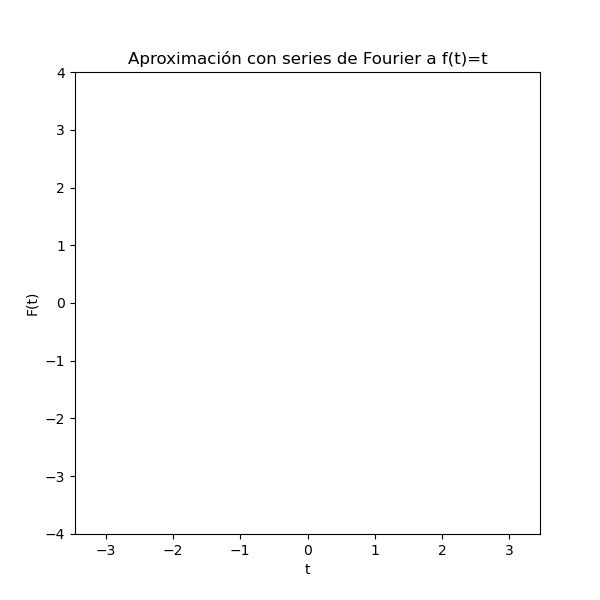

In [4]:
#Definición de parámetros para animación

n = 1   #Va a ir corriendo sobre el armónico
nt = 50     #Ciclos en los que se suman los coeficientes de Fourier definidos en f. Permite llegar al armónico 50

fig = plt.figure(figsize=(6,6))     #Se inicializa la figura dónde se va a ir graficando la función a medida que se sumen más armónicos
plt.xlabel('t')
plt.title('Aproximación con series de Fourier a f(t)=t')
plt.ylabel('F(t)')
camera = Camera(fig)        

while n < nt:             #Ciclo en el que se suman los armónicos y se van generando las imágenes para animación
    F += f(x,n)
    plt.plot(x,x,c='b')
    plt.plot(x,F,c='k')
    camera.snap()
    n +=1
    
animation = camera.animate()     #Animación
#animation.save('Fourier.mp4')    #Guardar la animación

# Manchas solares

In [5]:
#Obtener los datos de internet

!rm Data/*
file = 'ManchasSolares.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionales/ManchasSolares.dat'

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('\n Descargado')
else:
    Path_ = file

"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [6]:
#Carga de las columnas necesarias

data = np.loadtxt(Path_)     
años1 = data[:,0]
mes = data[:,1]
manchas1 = data[:,3]   #Tomamos la columna 4

<IPython.core.display.Javascript object>


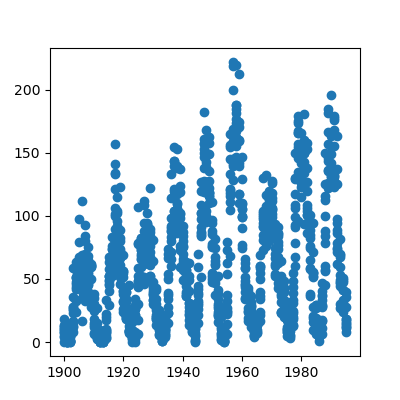

In [7]:
#Filtrando datos

year = []
month = []
manchas = []

for i in range(len(años1)):
    
    if años1[i] >= 1900: 
        
        year.append(años1[i])
        month.append(mes[i])
        manchas.append(manchas1[i])

plt.figure(figsize=(4,4))
plt.scatter(year, manchas)

años = np.array(year)
mes = np.array(month)
manchas = np.array(manchas)

In [8]:
#Quitar el valor medio de los datos para que esté centrado en cero

a = np.mean(manchas)    #Valor medio de las manchas solares
manchas = manchas - a   

<IPython.core.display.Javascript object>


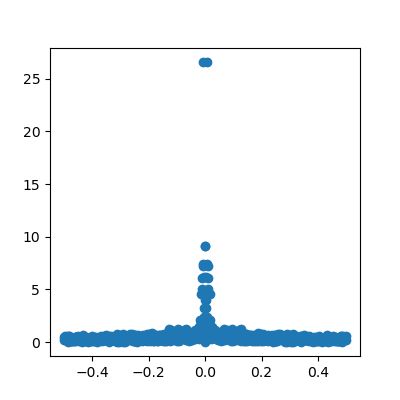

In [9]:
#Calculando

fft = np.fft.fft(manchas)                  #Transformada de Fourier cantidad de manchas
Freq = np.fft.fftfreq(len(manchas),1)      #Obtener frecuencias, len(manchas) se refiere al número de puntos, paso temporal
ffta = np.abs(fft/len(manchas))            #El paso temporal es de a 1 mes, es importante porque el periodo se obtendrá en meses

plt.figure(figsize=(4,4))
plt.scatter(Freq,ffta)

In [10]:
#Cómo es simétrico se puede descartar la información menor a cero

mask = Freq < 0

ffta[mask] = 0

In [11]:
#Para encontrar el modo que más contribuye y el periodo

ii = np.argmax(np.abs(ffta))  #Oscilación fundamental

Periodo_meses = 1/Freq[ii]
Periodo_años = 1/(Freq[ii]*12)     #Se ajusta la temporalidad a años

In [12]:
#Para depurar las frecuencias

for i in range(len(Freq)):
    
    if i != ii:
        
        fft[i] = 0                #Para dejar solamente el modo predominante, se ajusta la transformada 
                                  #de Fourier a cero para todas las demás frecuencia

<IPython.core.display.Javascript object>


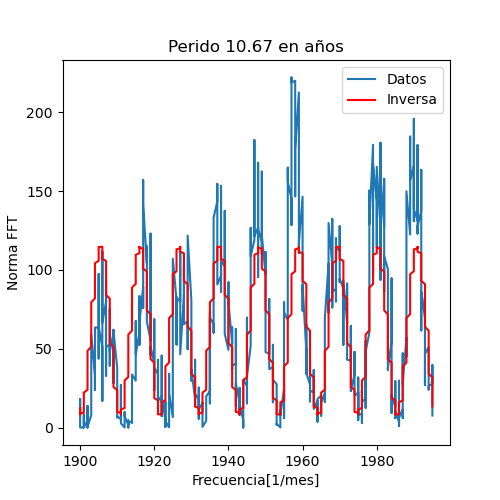

Text(0.5, 1.0, 'Perido 10.67 en años')

In [13]:
#Reproduciendo gráfica con transformada inversa

y = np.fft.ifft(2*fft) + a          #Se multiplica por 2 para ajustar normalización y se suma a para centrar en el mismo valor que los datos

plt.figure(figsize=(5,5))
plt.plot(años,manchas+a, label = 'Datos')
plt.plot(años,np.real(y), c='r', label = 'Inversa')
plt.xlabel('Frecuencia[1/mes]')
plt.ylabel('Norma FFT')
plt.legend()
plt.title('Perido {:.2f} en años'.format(Periodo_años))

In [14]:
#Reproduciendo gráfica con función seno

def fundamental(t): 
    
    y = []
    
    for i in t:
        
        y.append(55*np.sin(2*np.pi*1/Periodo_años*(i-90)) + a)    #Se desfasa temporalmente para ajustar a los datos y se ajusta amplitud con amplitud promedio de datos
        
    return np.array(y)

<IPython.core.display.Javascript object>


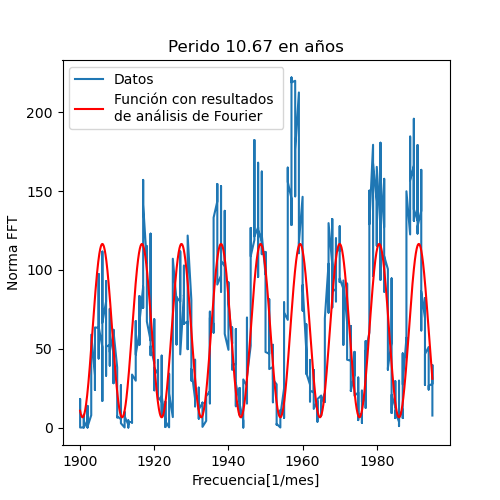

Text(0.5, 1.0, 'Perido 10.67 en años')

In [15]:
t = np.linspace(np.min(años), np.max(años), 2000)
y = fundamental(t)

plt.figure(figsize=(5,5))
plt.plot(años,manchas+a, label = 'Datos')
plt.plot(t,y, c='r', label = 'Función con resultados \nde análisis de Fourier')
plt.xlabel('Frecuencia[1/mes]')
plt.ylabel('Norma FFT')
plt.legend()
plt.title('Perido {:.2f} en años'.format(Periodo_años))

# Derivada espectral

In [3]:
dx = 4*np.pi/100
x1 = np.linspace(-2*np.pi, 2*np.pi, 100)

def GetSample(x):
    
    y = np.exp(-0.1*x)*np.sin(x)
    
    return y

muestra = GetSample(x1)

In [23]:
#Calcula la transformada de Fourier y las frecuencias

fft = np.fft.fft(muestra)
#freq = np.linspace(0, 20*4*np.pi, 100)
#freq = np.linspace(0, 99*1/(4*np.pi), 100) * 2*np.pi/(4*np.pi)
freq = np.linspace(-100,100,100) * 2*np.pi/(4*np.pi) #Se multiplica por 2pi para pasar al espacio de frecuencias y se divide en el periodo
#freq = np.fft.fftshift(freq)

#a = np.max(freq)

#freq += a

nuevo = fft*(freq)*-1j/len(muestra)

inv = np.fft.ifft(2*nuevo)

<IPython.core.display.Javascript object>


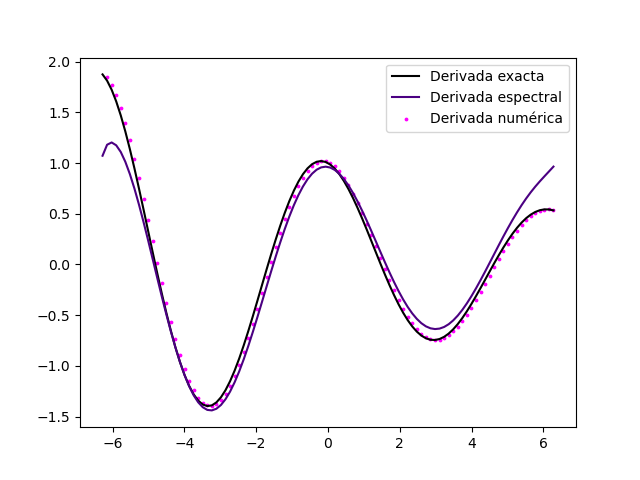

In [24]:
#Derivada exacta y derivada numérica

x = np.linspace(-2*np.pi, 2*np.pi, 100)

y = np.exp(-0.1*x)*np.sin(x) # Función original

dy_exac = np.exp(-0.1*x)*np.cos(x)-0.1*np.exp(-0.1*x)*np.sin(x) # Derivada exacta

dy_num = np.diff(y)/np.diff(x) # Derivada numérica

plt.figure()
#plt.plot(x, y, label='Función original', c='k')
plt.plot(x, dy_exac, label='Derivada exacta', c='k')
plt.scatter(x[1:], dy_num, label='Derivada numérica', c='magenta', s=3)
plt.plot(x1,np.real(inv), '-',label = 'Derivada espectral', c='indigo')
 
plt.legend()
plt.show()

La derivada numérica presenta un error mucho menor que la derivada espectral, esto puede deberse al ajuste de las frecuencias, por otra parte, en los bordes no coindicide debido a que la aproximación se hace a partir de una serie de Fourier. 

# Función $$\zeta(6)$$  de Riemann

## Identidad de Parseval 

$$ \frac{1}{2\pi} \int_{-\pi}^{\pi} \left(\frac{t^3}{12} - \frac{\pi^2t}{12}\right)^2 dt = \frac{1}{2}\sum_{n=1}^{\infty} \left(\frac{(-1)^n}{n^3}\right)^2 $$

In [21]:
import sympy as sp

def f():                               #Función obtenida de la integral analítica.
    
    x = sp.Symbol('x') 
    y = (x**3)/12 - (np.pi**2)*x/12
    
    return y

def Parseval(T, f):                    #Identidad de Parseval
    
    x = sp.Symbol('x')
    y = f**2
    integral = sp.integrate(y,(x, -T/2, T/2))     #Integral numérica
    
    return (1/T)*integral                  #Retorna el lado izquierdo de la identidad de Parseval

izq = Parseval(2*np.pi, f())

$$ \frac{1}{\pi} \int_{-\pi}^{\pi} \left(\frac{t^3}{12} - \frac{\pi^2t}{12}\right)^2 dt = \sum_{n=1}^{\infty} \frac{1}{n^6} = \zeta(6) $$

In [22]:
#Para obtener el valor de la función zeta(6) haría falta multiplicar el resultado de la función Parseval por 2

zeta_6 = 2*izq

# Calculando error porcentual

z_6_teo = np.pi**6/945

err = (z_6_teo - zeta_6)/z_6_teo * 100

## Otro método

#### Se realiza la aproximación tomando solo la parte derecha de la identidad de Parseval para la función re definida

In [23]:
n_max = 20000      #Cantidad de términos tomada
n = 1
z_2 = 0            #Inicialización de función

while n < n_max:         #Desarrollo de suma hasta el término n_max
    
    z_2+= 1/(n**6)
    n+=1
    
err1 = (z_6_teo - z_2)/z_6_teo * 100   

print('Valor estimado con Parseval:', zeta_6)
print('Valor estimado con sumatoria:', z_2)
print('Valor teórico:', z_6_teo)
print('Con el método realizado el error entre el valor estimado con Parseval y el valor teórico es:', abs(err), '%, mientras que el error mientras que el error entre el valor estimado con la sumatoria y el valor teórico es:', abs(err1), '%')

Valor estimado con Parseval: 1.01734306198445
Valor estimado con sumatoria: 1.017343061984441
Valor teórico: 1.017343061984449
Con el método realizado el error entre el valor estimado con Parseval y el valor teórico es: 2.18259320009424e-14 %, mientras que el error mientras que el error entre el valor estimado con la sumatoria y el valor teórico es: 7.857335520339271e-13 %


El error de la sumatoria va a disminuir a medida que aumentemos el n_max puesto que se toman más términos de la sumatoria